In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

## Q1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
print(df_1.head())
print(df_1.tail())

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64
YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64


In [4]:
df_2 = pd.read_csv("Sparkling.csv")

In [5]:
date = pd.date_range(start='1/1/1980', end='1/7/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [6]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [7]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [8]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


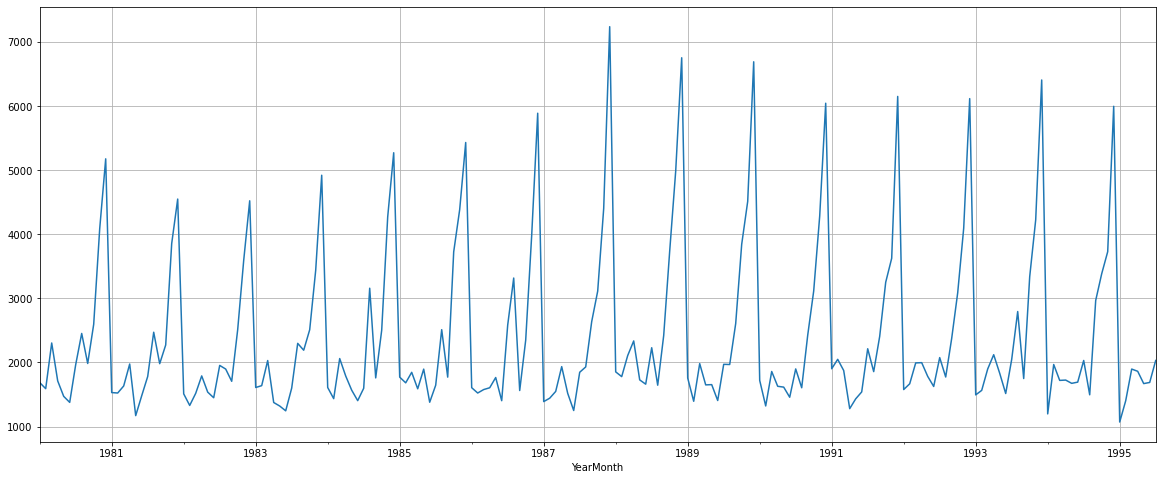

In [9]:
df_1.plot(figsize=(20,8))
plt.grid();

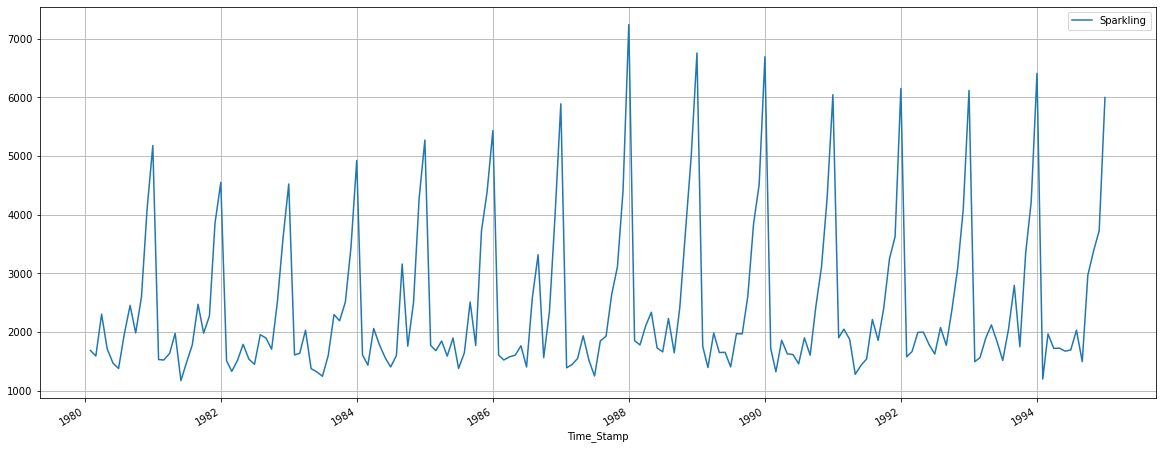

In [10]:
df.plot(figsize=(20,8))
plt.grid()

## Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [12]:
df.isna().sum()

Sparkling    0
dtype: int64

In [13]:
df.shape

(187, 1)

## YEARLY BOXPLOT

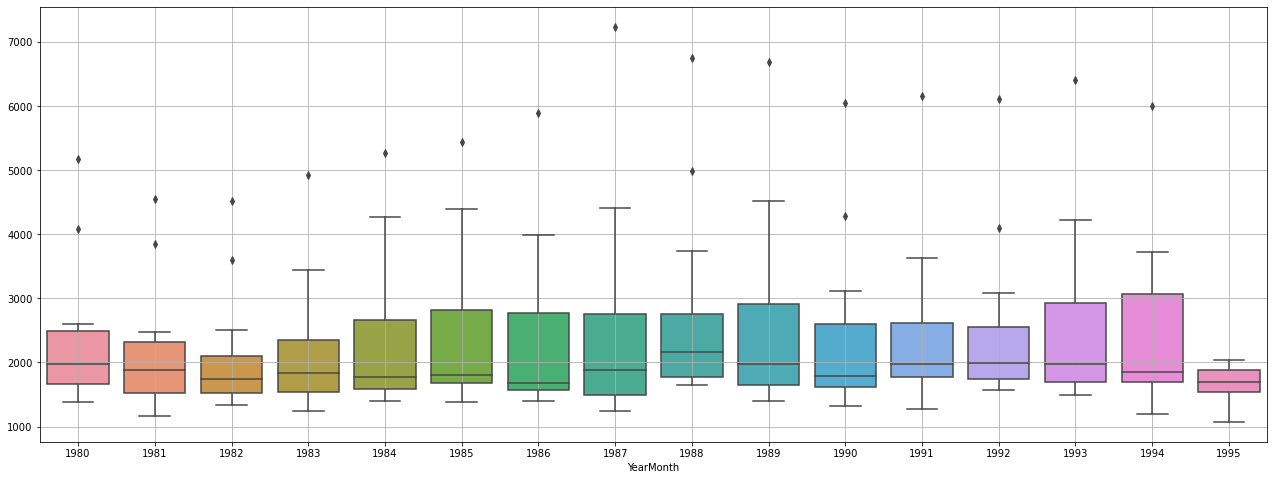

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### MONTHLY BOXPLOT

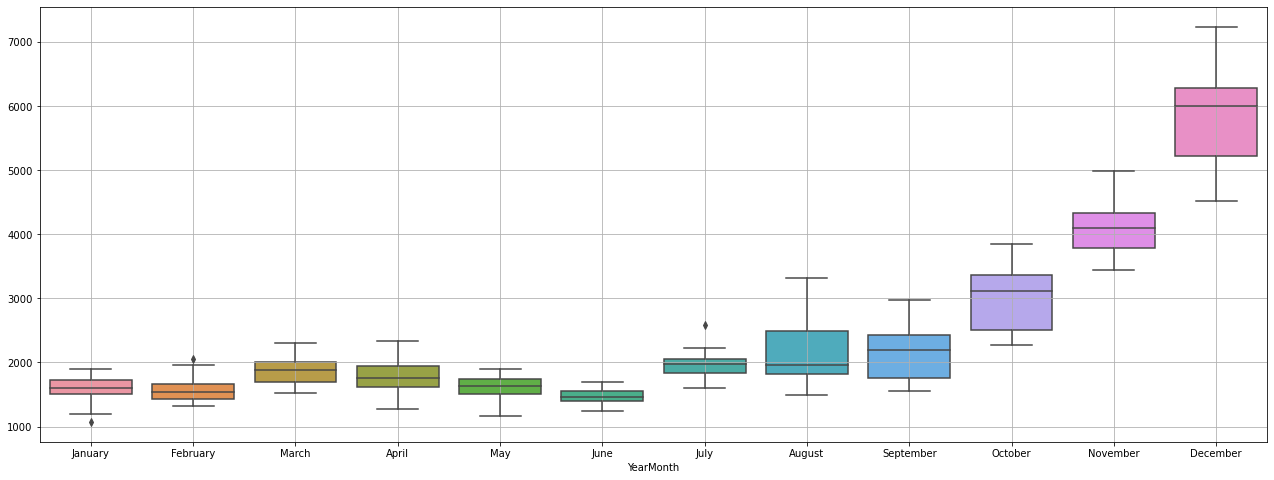

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980.0,1712,2453,5179,1591,1686,1966,1377,2304,1471,4087,2596,1984
1981.0,1976,2472,4551,1523,1530,1781,1480,1633,1170,3857,2273,1981
1982.0,1790,1897,4524,1329,1510,1954,1449,1518,1537,3593,2514,1706
1983.0,1375,2298,4923,1638,1609,1600,1245,2030,1320,3440,2511,2191
1984.0,1789,3159,5274,1435,1609,1597,1404,2061,1567,4273,2504,1759
1985.0,1589,2512,5434,1682,1771,1645,1379,1846,1896,4388,3727,1771
1986.0,1605,3318,5891,1523,1606,2584,1403,1577,1765,3987,2349,1562
1987.0,1935,1930,7242,1442,1389,1847,1250,1548,1518,4405,3114,2638
1988.0,2336,1645,6757,1779,1853,2230,1661,2108,1728,4988,3740,2421


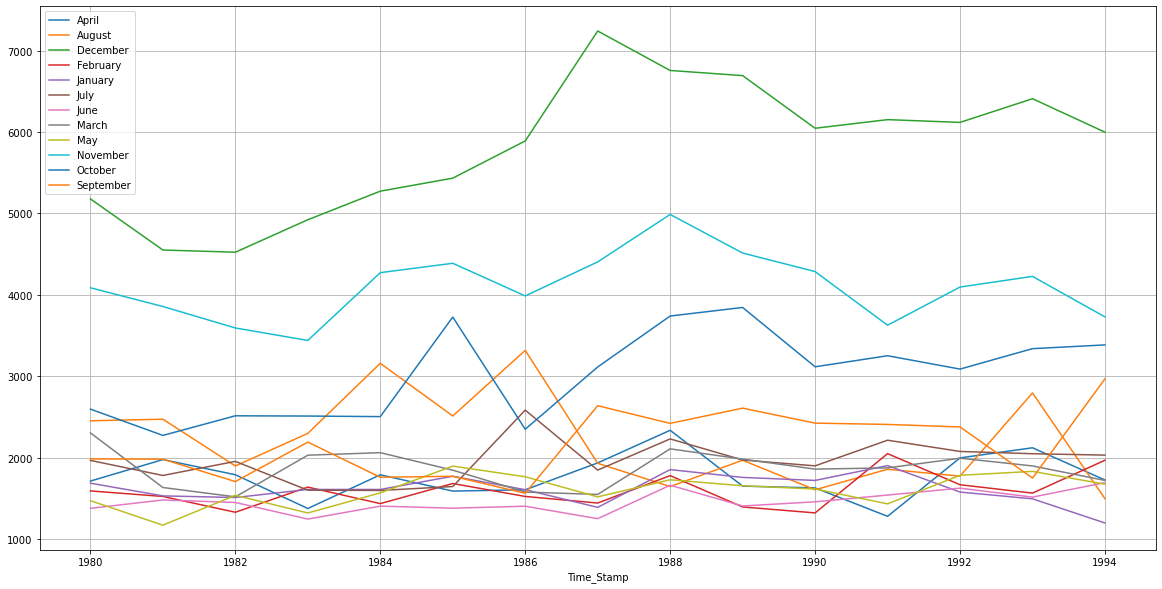

In [17]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

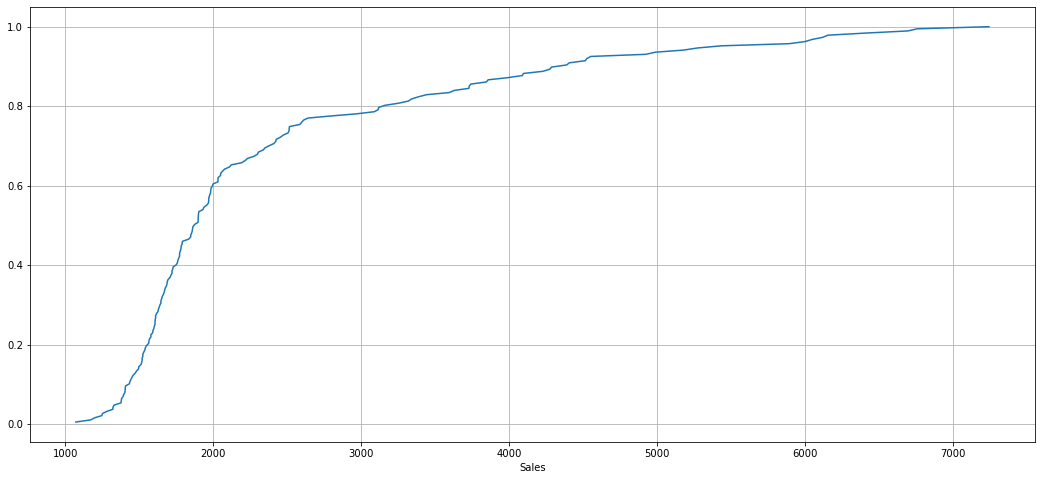

In [18]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

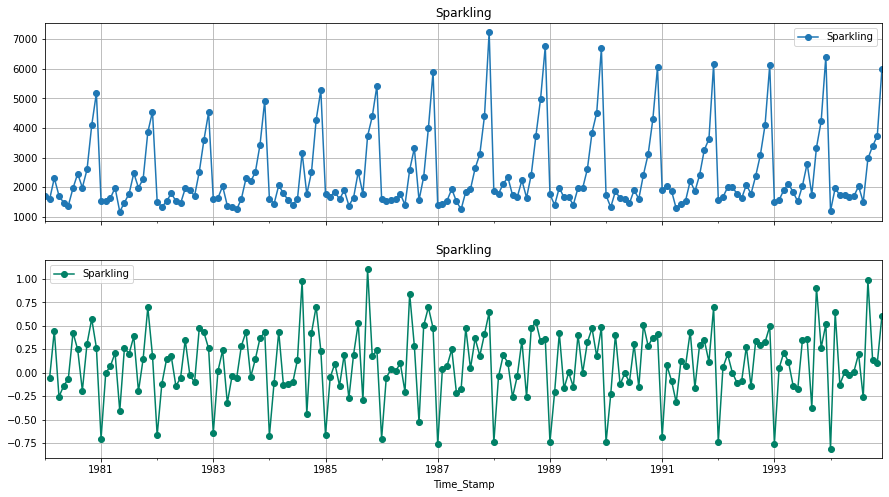

In [19]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling",grid=True)

## Decompose the Time Series and plot the different components.

In [20]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

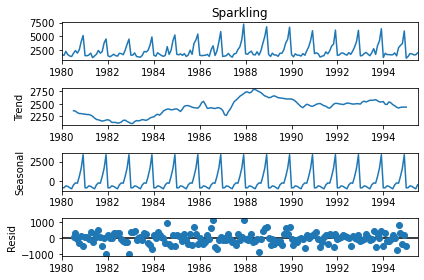

In [22]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


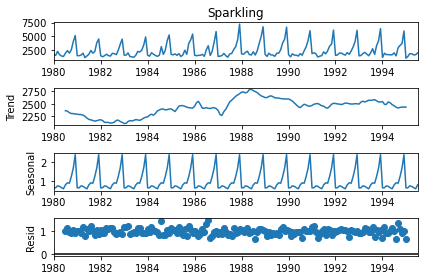

In [24]:
decomposition = seasonal_decompose(df_1,model='multipicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## Q3. Split the data into training and test. The test data should start in 1991.

In [26]:
df.index.year.unique()

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,    nan],
             dtype='float64', name='Time_Stamp')

In [27]:
# Drop the last year rows as data is incomplete ( only for 7 months data is provided)
df = df.head(-7)  
# Printing dataframe
df.tail()

,Sparkling
Time_Stamp,
1994-08-31,1495
1994-09-30,2968
1994-10-31,3385
1994-11-30,3729
1994-12-31,5999


In [28]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [29]:
test.tail(5)

,Sparkling
Time_Stamp,
1994-08-31,1495
1994-09-30,2968
1994-10-31,3385
1994-11-30,3729
1994-12-31,5999


In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(48, 1)


In [31]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999 



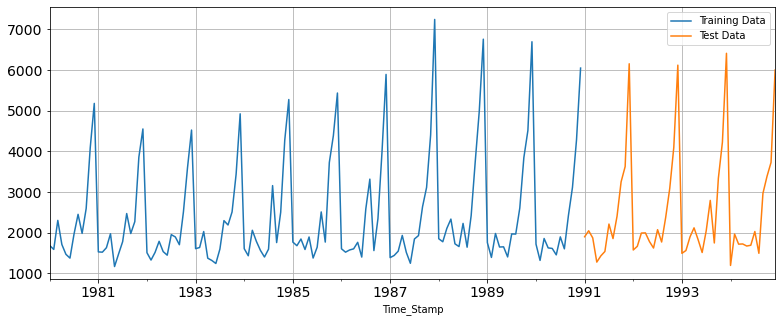

In [32]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1994-08-31       1495   176
1994-09-30       2968   177
1994-10-31       3385   178
1994-11-30       3729   179
1994-12-31       5999   180 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

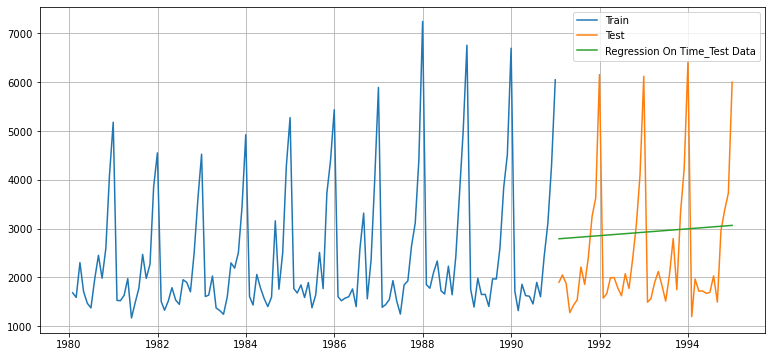

In [39]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [40]:
from sklearn import metrics

### Model Evaluation

In [41]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1378.580


In [42]:
resultsDf_1 = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = resultsDf_1
resultsDf

,RMSE
RegressionOnTime,1378.580256


### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [43]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [44]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

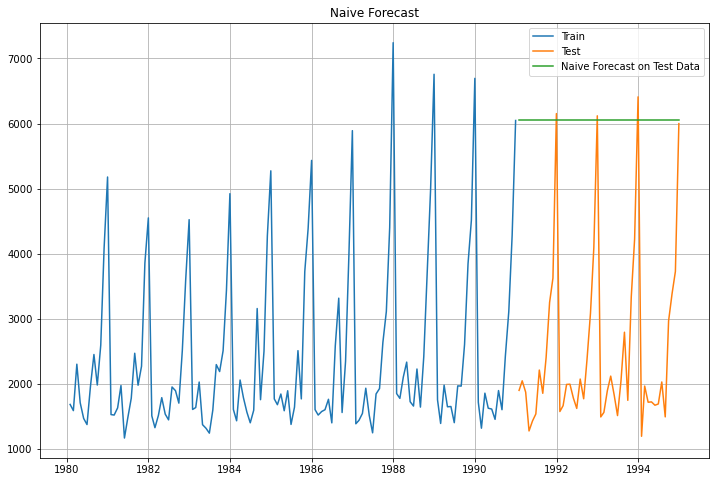

In [45]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [46]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3780.227


In [47]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721


### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [48]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [49]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


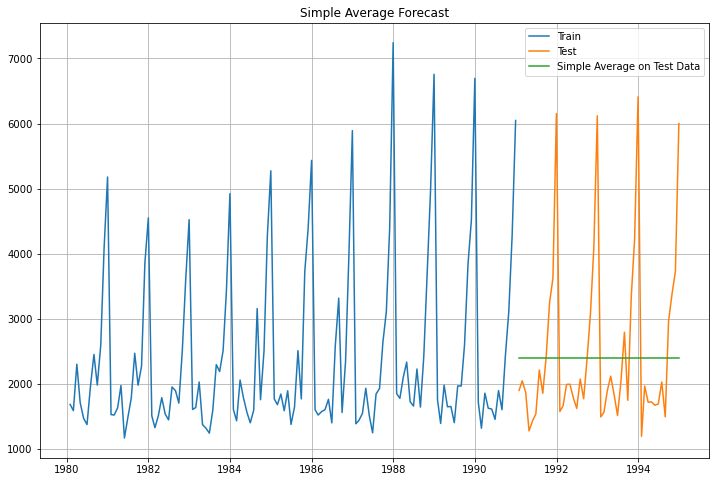

In [50]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [51]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1329.930


In [52]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685


In [53]:
df_2.tail(10)

,YearMonth,Sparkling,Time_Stamp
177,1994-10,3385,1994-10-31
178,1994-11,3729,1994-11-30
179,1994-12,5999,1994-12-31
180,1995-01,1070,NaT
181,1995-02,1402,NaT
182,1995-03,1897,NaT
183,1995-04,1862,NaT
184,1995-05,1670,NaT
185,1995-06,1688,NaT
186,1995-07,2031,NaT


### METHOD 4: MOVING AVERAGE

In [54]:
MovingAverage = df.copy()
MovingAverage.tail()

,Sparkling
Time_Stamp,
1994-08-31,1495
1994-09-30,2968
1994-10-31,3385
1994-11-30,3729
1994-12-31,5999


In [55]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


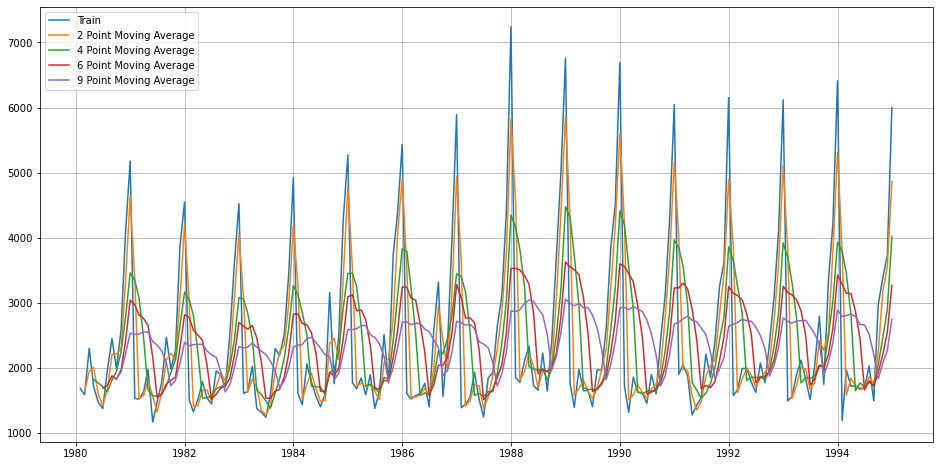

In [56]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [57]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.734)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.734):]

In [58]:
trailing_MovingAverage_train.tail(5)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1990-08-31,1605,1752.0,1644.00,1677.166667,2199.777778
1990-09-30,2424,2014.5,1846.25,1771.333333,1725.333333
1990-10-31,3116,2770.0,2261.00,2019.333333,1880.444444
1990-11-30,4286,3701.0,2857.75,2464.500000,2209.888889
1990-12-31,6047,5166.5,3968.25,3229.500000,2675.222222


In [59]:
trailing_MovingAverage_test.head(5)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1991-01-31,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-28,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-31,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-30,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-31,1432,1355.5,1658.50,2430.500000,2712.111111


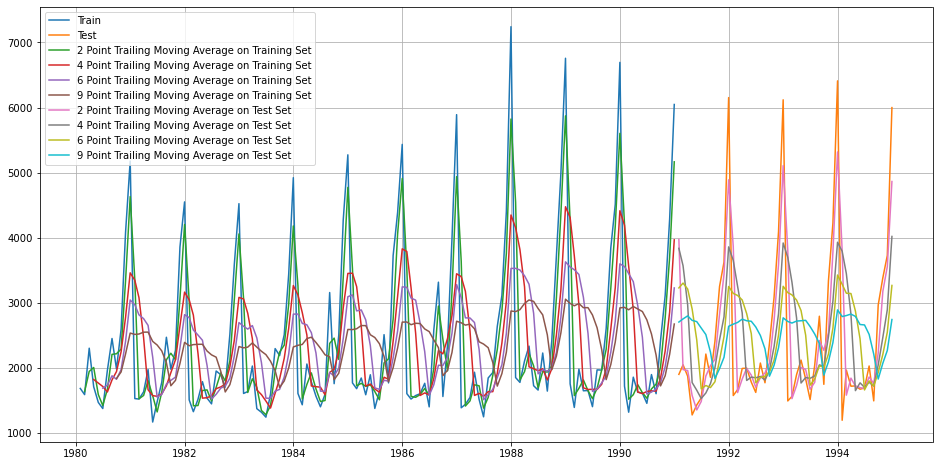

In [60]:

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [61]:
# Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 793.037
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1155.560
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1302.932
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1388.802 


In [62]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927


### Before we go on to build the various Exponential Smoothing models,the models are plotted and compare the Time Series plots.

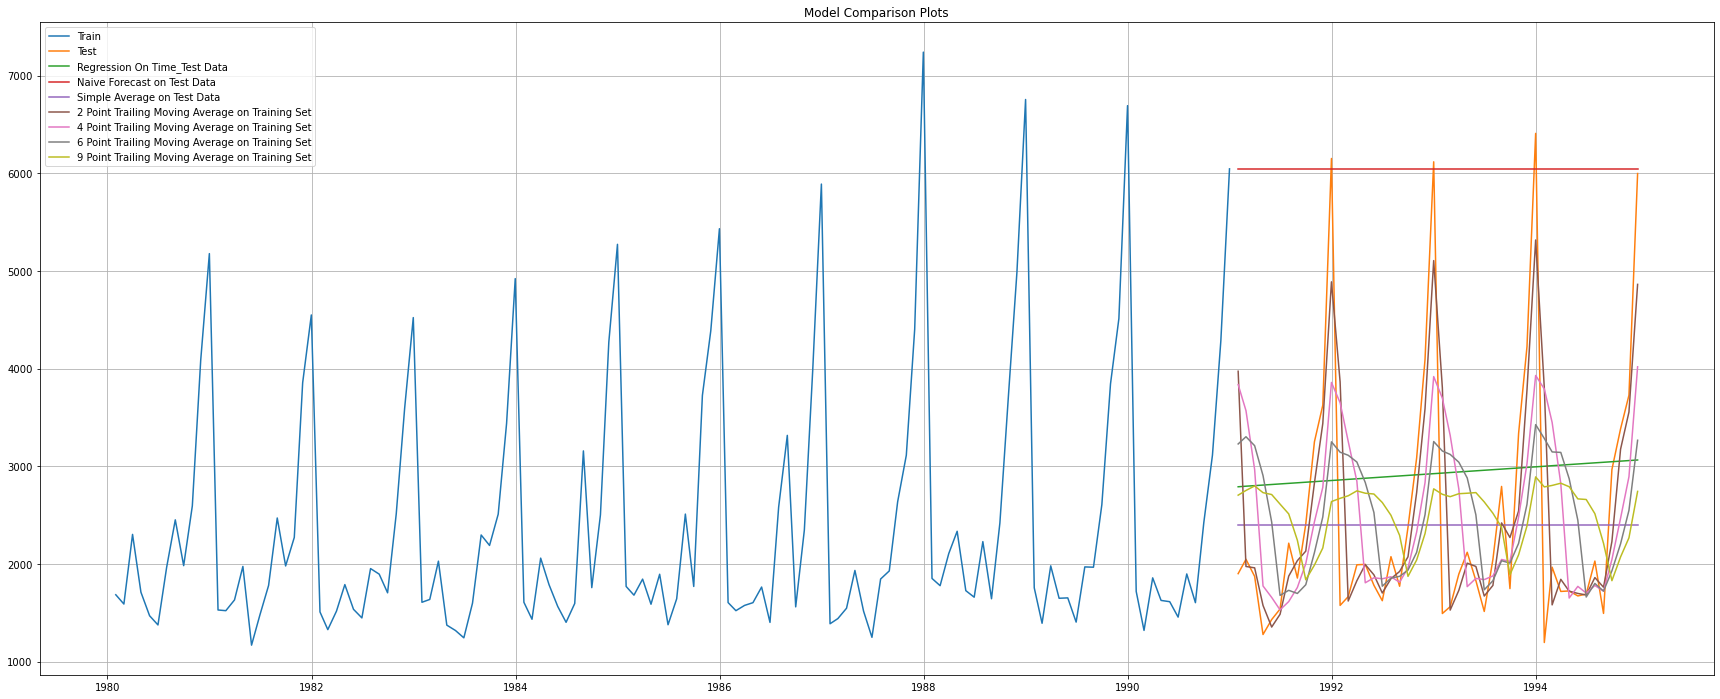

In [63]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head(5)

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.932624
1991-02-28,2049,2724.932624
1991-03-31,1874,2724.932624
1991-04-30,1279,2724.932624
1991-05-31,1432,2724.932624


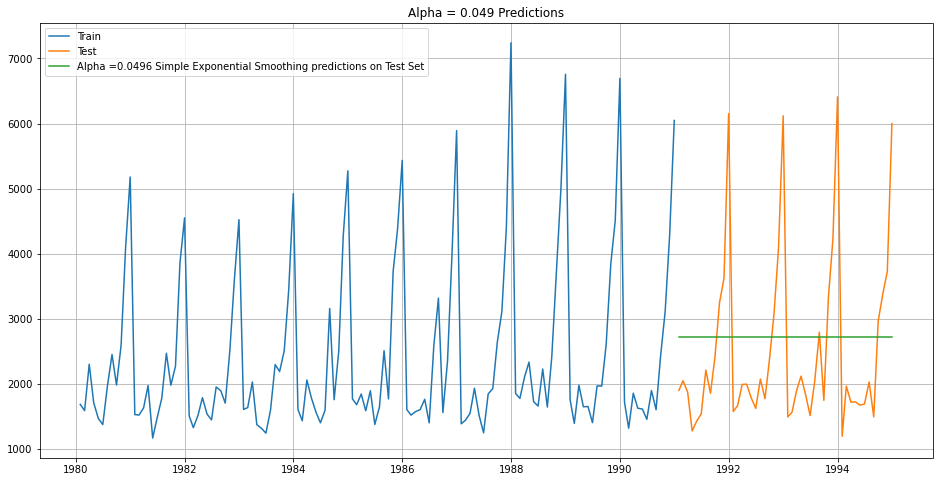

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.049 Predictions');

### Model Evaluation for $\alpha$ = 0.0496 : Simple Exponential Smoothing

In [71]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1343.724


In [72]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719


### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [73]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [74]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [75]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [76]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.675124
1991-02-28    2804.675124
1991-03-31    2804.675124
1991-04-30    2804.675124
1991-05-31    2804.675124
1991-06-30    2804.675124
1991-07-31    2804.675124
1991-08-31    2804.675124
1991-09-30    2804.675124
1991-10-31    2804.675124
1991-11-30    2804.675124
1991-12-31    2804.675124
1992-01-31    2804.675124
1992-02-29    2804.675124
1992-03-31    2804.675124
1992-04-30    2804.675124
1992-05-31    2804.675124
1992-06-30    2804.675124
1992-07-31    2804.675124
1992-08-31    2804.675124
1992-09-30    2804.675124
1992-10-31    2804.675124
1992-11-30    2804.675124
1992-12-31    2804.675124
1993-01-31    2804.675124
1993-02-28    2804.675124
1993-03-31    2804.675124
1993-04-30    2804.675124
1993-05-31    2804.675124
1993-06-30    2804.675124
1993-07-31    2804.675124
1993-08-31    2804.675124
1993-09-30    2804.675124
1993-10-31    2804.675124
1993-11-30    2804.675124
1993-12-31    2804.675124
1994-01-31    2804.675124
1994-02-28    2804.675124
1994-03-31  

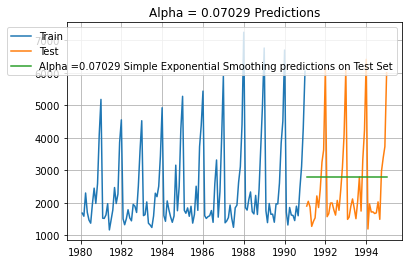

In [77]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.07029 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07029 Predictions');

In [78]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [79]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1358.9404884833777
SES RMSE (calculated using statsmodels): 1358.9404884833775


In [80]:
resultsDf_6= pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.0702,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719
"Alpha=0.0702,SES",1358.940488


### Holt - ETS(A, A, N) - Holt's linear method with additive errors

### Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [81]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [82]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

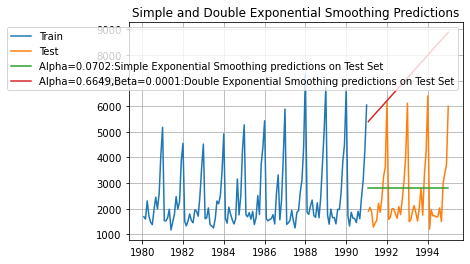

In [83]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0702:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.6649,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [84]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 4879.86657314999


In [85]:
resultsDf_7 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66499,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719
"Alpha=0.0702,SES",1358.940488
"Alpha=0.66499,Beta=0.0001:DES",4879.866573


### Inference

Here, we see that the Single Exponential Smoothing has performed well when compared to the Double Exponential Smoothing. This is because of low values in the trend component.


### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [86]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217746964548, 'smoothing_trend': 0.012360783178126748, 'smoothing_seasonal': 0.46071776538894016, 'damping_trend': nan, 'initial_level': 2356.578364436942, 'initial_trend': -0.018474239476475418, 'initial_seasons': array([-636.23349217, -722.98352055, -398.6435547 , -473.43067518,
       -808.42508553, -815.35030575, -384.23066985,   72.99524975,
       -237.44267238,  272.32595851, 1541.37820976, 2590.07753817]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [87]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1490.574551
1991-02-28    1204.714462
1991-03-31    1688.941256
1991-04-30    1551.450972
1991-05-31    1461.440602
1991-06-30    1278.907350
1991-07-31    1805.164222
1991-08-31    1679.251604
1991-09-30    2315.687875
1991-10-31    3225.309145
1991-11-30    4299.652613
1991-12-31    6411.161656
1992-01-31    1483.296915
1992-02-29    1197.436826
1992-03-31    1681.663620
1992-04-30    1544.173336
1992-05-31    1454.162966
1992-06-30    1271.629714
1992-07-31    1797.886586
1992-08-31    1671.973968
1992-09-30    2308.410239
1992-10-31    3218.031509
1992-11-30    4292.374977
1992-12-31    6403.884020
1993-01-31    1476.019279
1993-02-28    1190.159190
1993-03-31    1674.385984
1993-04-30    1536.895700
1993-05-31    1446.885330
1993-06-30    1264.352078
1993-07-31    1790.608950
1993-08-31    1664.696332
1993-09-30    2301.132603
1993-10-31    3210.753873
1993-11-30    4285.097341
1993-12-31    6396.606384
1994-01-31    1468.741643
1994-02-28    1182.881554
1994-03-31  

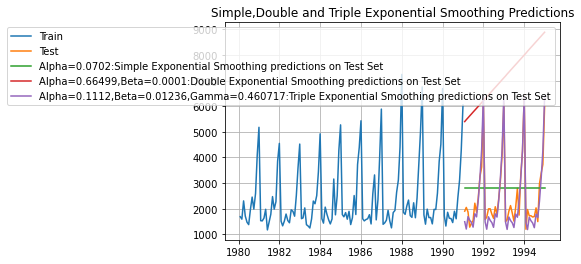

In [88]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0702:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66499,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1112,Beta=0.01236,Gamma=0.460717:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [89]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 387.1651015755533


In [90]:
resultsDf_8 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1112,Beta=0.01235,Gamma=0.460717:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719
"Alpha=0.0702,SES",1358.940488
"Alpha=0.66499,Beta=0.0001:DES",4879.866573


### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had high component of seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method (Multiplicative seasonality)

ETS(A, A, M) model

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11101523064586813, 'smoothing_trend': 0.0493150519338607, 'smoothing_seasonal': 0.3624464792152574, 'damping_trend': nan, 'initial_level': 2356.4981157471807, 'initial_trend': -9.804740061967985, 'initial_seasons': array([0.71351261, 0.68262962, 0.90447098, 0.80523467, 0.65565848,
       0.65382021, 0.88609683, 1.13334681, 0.91877227, 1.21174825,
       1.87063097, 2.37421776]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [92]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1587.921914
1991-02-28    1356.650344
1991-03-31    1763.350219
1991-04-30    1656.523868
1991-05-31    1542.386219
1991-06-30    1355.480857
1991-07-31    1854.708560
1991-08-31    1820.665822
1991-09-30    2277.675614
1991-10-31    3123.118775
1991-11-30    4130.016056
1991-12-31    5893.139956
1992-01-31    1539.025473
1992-02-29    1314.767912
1992-03-31    1708.771760
1992-04-30    1605.119264
1992-05-31    1494.399399
1992-06-30    1313.199426
1992-07-31    1796.703973
1992-08-31    1763.577111
1992-09-30    2206.069820
1992-10-31    3024.675950
1992-11-30    3999.492295
1992-12-31    5706.403171
1993-01-31    1490.129033
1993-02-28    1272.885480
1993-03-31    1654.193301
1993-04-30    1553.714661
1993-05-31    1446.412578
1993-06-30    1270.917996
1993-07-31    1738.699385
1993-08-31    1706.488400
1993-09-30    2134.464026
1993-10-31    2926.233125
1993-11-30    3868.968534
1993-12-31    5519.666385
1994-01-31    1441.232592
1994-02-28    1231.003048
1994-03-31  

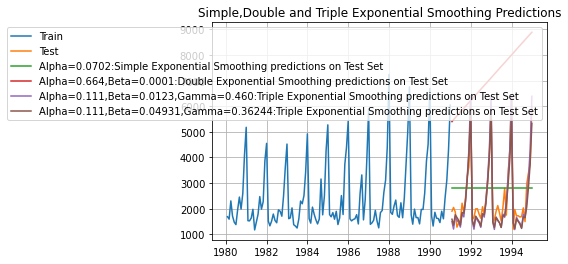

In [93]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0702:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.664,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.111,Beta=0.0123,Gamma=0.460:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.111,Beta=0.04931,Gamma=0.36244:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [94]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 407.41029599793075


In [95]:
resultsDf_9 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.04931,Gamma=0.36244:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,RMSE
RegressionOnTime,1378.580256
NaiveModel,3780.226721
SimpleAverageModel,1329.929685
2pointTrailingMovingAverage,793.036740
4pointTrailingMovingAverage,1155.559612
6pointTrailingMovingAverage,1302.932089
9pointTrailingMovingAverage,1388.801927
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719
"Alpha=0.0702,SES",1358.940488
"Alpha=0.66499,Beta=0.0001:DES",4879.866573


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

##  Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [97]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.832
DF test p-value is 0.6888980541551387
Number of lags used 11


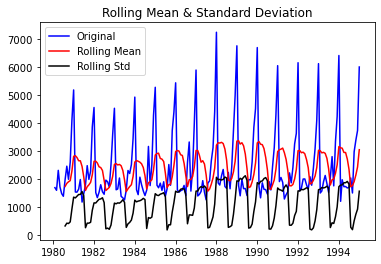

Results of Dickey-Fuller Test:
Test Statistic                  -1.311362
p-value                          0.623958
#Lags Used                      11.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64 



In [98]:
test_stationarity(df['Sparkling'].dropna())

We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [99]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -42.700
DF test p-value is 0.0
Number of lags used 10


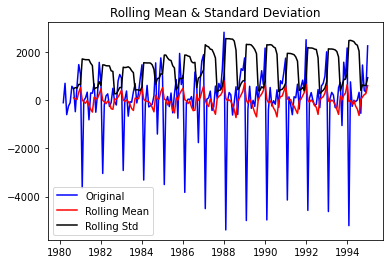

Results of Dickey-Fuller Test:
Test Statistic                 -42.902281
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64 



In [100]:
test_stationarity(df['Sparkling'].diff().dropna())

Now, let us go ahead and plot the stationary series.

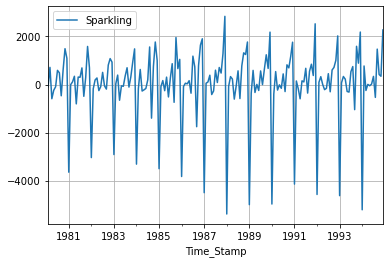

In [101]:
df.diff().dropna().plot(grid=True);

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

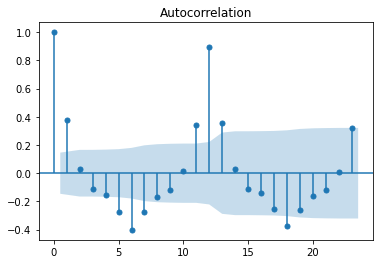

In [103]:
plot_acf(df,alpha=0.05); 

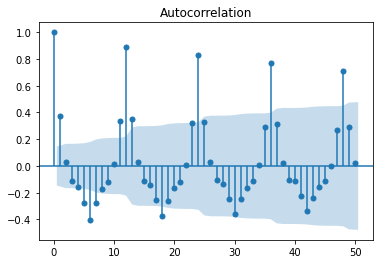

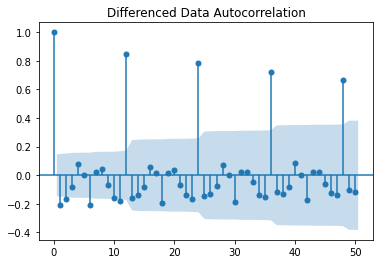

In [104]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show() #q=2 (from 2nd plot) and S=6,12 for seasonal arima (from 2nd plot)

From the above plots, we can say that there seems to be a seasonality in the data.

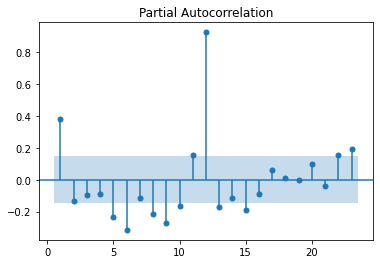

In [105]:
plot_pacf(df,zero=False,alpha=0.05); 

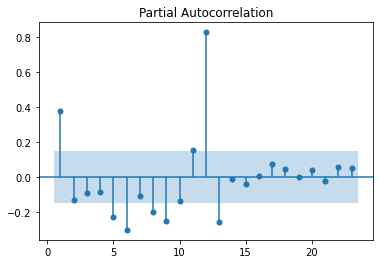

In [106]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle'); # p=1

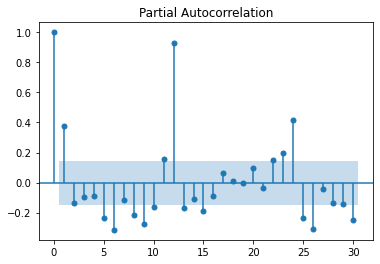

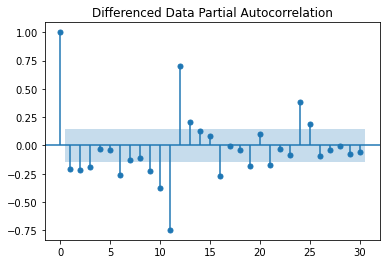

In [107]:
plot_pacf(df['Sparkling'],lags=30)
plot_pacf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show() #p=3 (from 2nd plot)

### Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [108]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994],
           dtype='int64', name='Time_Stamp')

In [109]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [110]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [111]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1994-08-31,1495
1994-09-30,2968
1994-10-31,3385
1994-11-30,3729
1994-12-31,5999


In [112]:
print(train.shape)
print(test.shape)

(132, 1)
(48, 1)


#### Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

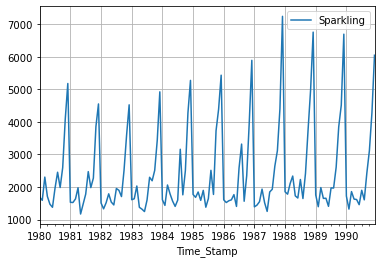

In [113]:
train.plot(grid=True);

In [114]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


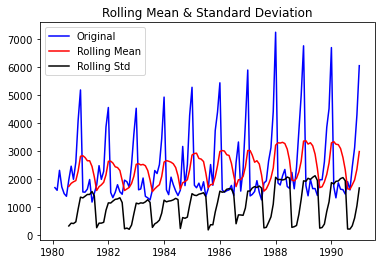

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [115]:
test_stationarity(train['Sparkling'])

The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [116]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


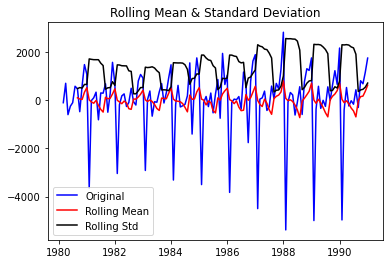

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [117]:
test_stationarity(train['Sparkling'].diff().dropna())

Now, let us go ahead and plot the differenced training data.

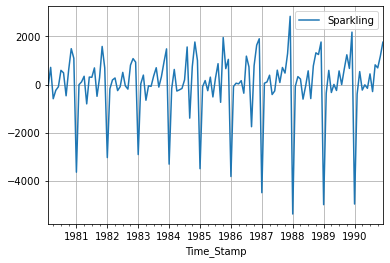

In [118]:
train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. 

### Building an automated version of ARIMA model by using lowest AIC 

In [120]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [122]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(0, 1, 3) - AIC:2233.994857753515
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2235.607816390617
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.921136688177
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498878057432
ARIMA(3, 1, 2) - AIC:2230.759636959836
ARIMA(3, 1, 3) - AIC:2221.4566102276085


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.456610
14,"(3, 1, 2)",2230.759637
11,"(2, 1, 3)",2232.921137
9,"(2, 1, 1)",2233.777626


In [124]:
auto_ARIMA = ARIMA(train, order=(2,1,2), freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 23 May 2021   AIC                           2213.509
Time:                        08:00:36   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

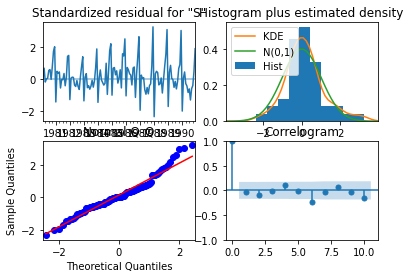

In [125]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using automated ARIMA model and evaluate the model

In [126]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [127]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [128]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1329.406019119613 
MAPE: 43.893226520603946


In [129]:
resultsDf_10 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

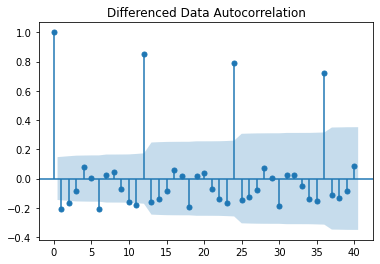

In [130]:
plot_acf(df['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()
 # to find sesonality of SARIMA . SA=6, 12

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [131]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [132]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [133]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536885285
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844427693
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123815902
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510798


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565727
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082825
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339541468
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135562
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274257234
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103818865
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933228848
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036718705149
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168729
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215843
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151460686604
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689235263
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111271789998
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6938117659683
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.653707904919
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190985640728
SARIMA(0, 1, 2)x(2, 0, 2, 6) - 

In [134]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888805
53,"(1, 1, 2)","(2, 0, 2, 6)",1729.938537
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703672
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379779
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040750


In [135]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 23 May 2021   AIC                           1727.889
Time:                                   08:01:22   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.871

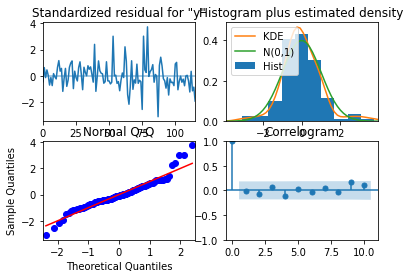

In [136]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using automated SARIMA model (seasonality=6) and evaluate the model.

In [137]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [138]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1375.723266,384.067675,622.964456,2128.482077
1,1116.867397,392.833844,346.927212,1886.807582
2,1667.668042,395.405759,892.686995,2442.649089
3,1528.423107,397.964142,748.427721,2308.418492
4,1372.367185,400.506237,587.389385,2157.344984


In [139]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 572.0193624004195 
MAPE: 22.966429718234306


In [140]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [141]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [142]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [143]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [144]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.076790
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121579
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [145]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 23 May 2021   AIC                           1555.584
Time:                                    08:02:21   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

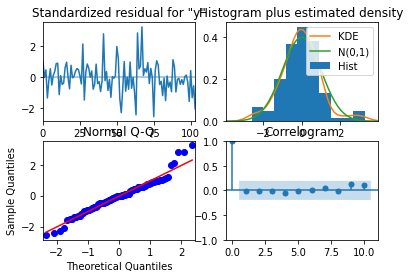

In [146]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using automated SARIMA model (seasonality=12) and evaluate the model.

In [147]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [148]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.420690,388.340435,566.287424,2088.553956
1,1315.131011,401.998581,527.228271,2103.033752
2,1621.592088,401.992199,833.701856,2409.482321
3,1598.894150,407.229343,800.739304,2397.048996
4,1392.700709,407.958777,593.116199,2192.285219


In [149]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 522.9815388391719 
MAPE: 19.659414367061775


In [150]:
resultsDf_12= pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf,resultsDf_12])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

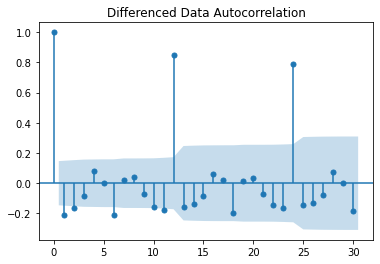

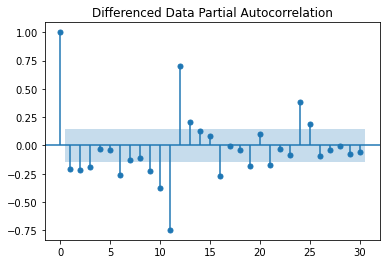

In [151]:
plot_acf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

##### p=3, q=2, d= 1, SA= 6,12

In [152]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.380
Date:                Sun, 23 May 2021   AIC                           2230.760
Time:                        08:02:23   BIC                           2248.011
Sample:                    01-31-1980   HQIC                          2237.770
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4318      0.044     -9.897      0.000      -0.517      -0.346
ar.L2          0.3297      0.109      3.022      0.003       0.116       0.544
ar.L3         -0.2384      0.066     -3.640      0.0

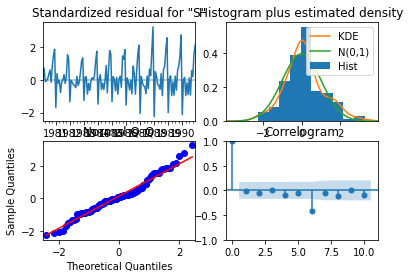

In [153]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using manual ARIMA model and evaluate the model.

In [154]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [155]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1325.920593997978 
MAPE: 41.71428902796663


In [156]:
resultsDf_13 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf_13])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


### Building a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

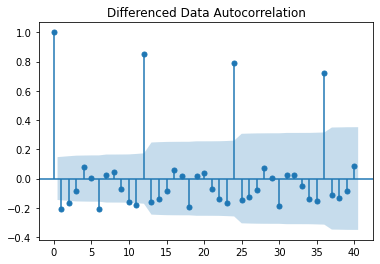

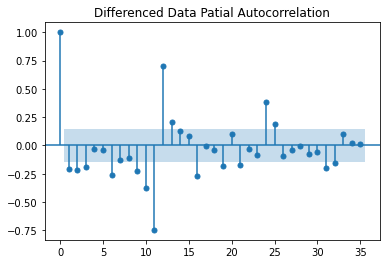

In [157]:
plot_acf(df['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=35,title='Differenced Data Patial Autocorrelation')
plt.show()

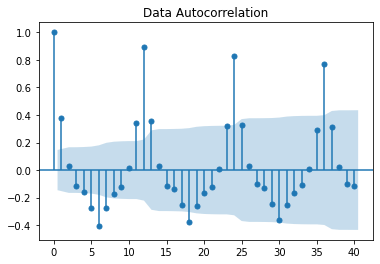

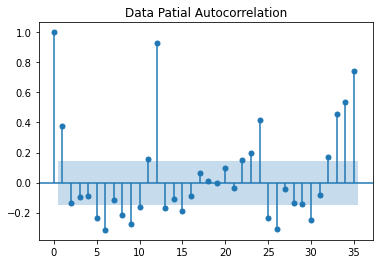

In [158]:
plot_acf(df['Sparkling'],lags=40,title='Data Autocorrelation')
plot_pacf(df['Sparkling'],lags=35,title='Data Patial Autocorrelation')
plt.show() #To find P and Q P=1, Q=1

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

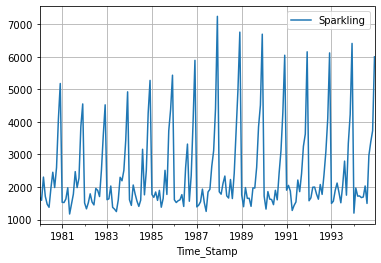

In [159]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

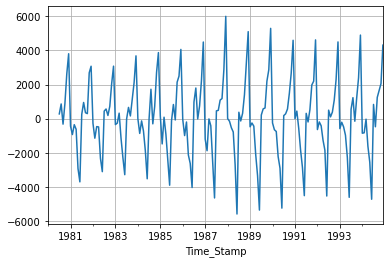

In [160]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

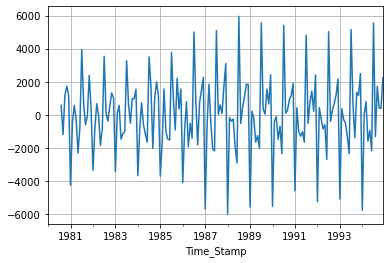

In [161]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

#### CHECKINGT HE STATIONARITY OF TEST DATA

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

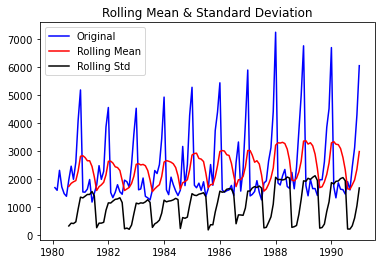

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [162]:
test_stationarity((train['Sparkling'].dropna()))

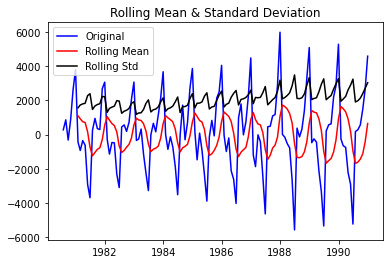

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [163]:
test_stationarity((train['Sparkling'].diff(6).dropna()))

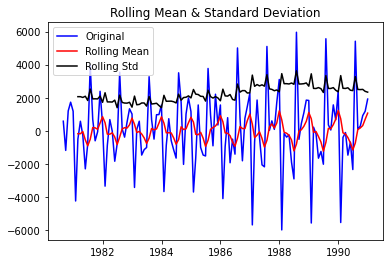

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [164]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

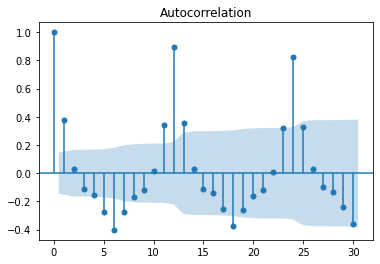

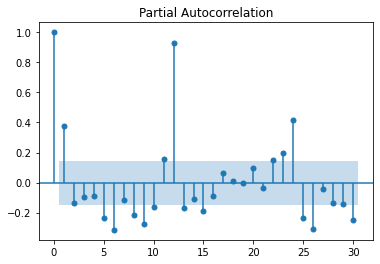

In [165]:
plot_acf(df['Sparkling'],lags=30)
plot_pacf(df['Sparkling'],lags=30)
plt.show()
        # To find P and Q  Q=1 and P=1

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [166]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 6)   Log Likelihood                -965.436
Date:                             Sun, 23 May 2021   AIC                           1946.873
Time:                                     08:02:27   BIC                           1969.305
Sample:                                          0   HQIC                          1955.984
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4404      0.112      3.931      0.000       0.221       0.660
ar.L2         -0.3676      

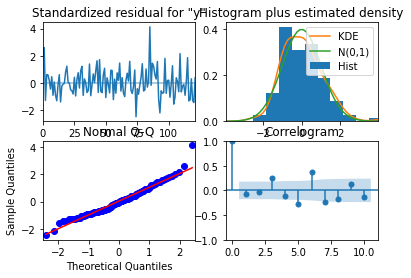

In [167]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

### Predict on the Test Set using manual SARIMA model (Seasonality=6) and evaluate the model.

In [168]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [169]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2439.636701,619.486052,1225.466350,3653.807051
1,1588.517937,619.720178,373.888707,2803.147167
2,1612.447839,635.476356,366.937069,2857.958610
3,1334.062046,662.033342,36.500538,2631.623554
4,805.327578,665.550788,-499.127996,2109.783151


In [170]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 911.0149075155055 
MAPE: 35.67575890169932


In [171]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,2)(1,0,1,6)'])

resultsDf = pd.concat([resultsDf,resultsDf_14])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


### Building a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

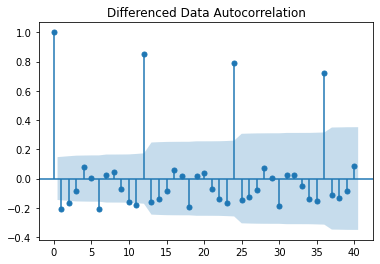

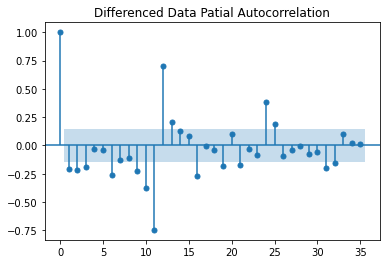

In [172]:
plot_acf(df['Sparkling'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=35,title='Differenced Data Patial Autocorrelation')
plt.show()   
# p = 2, q= 3

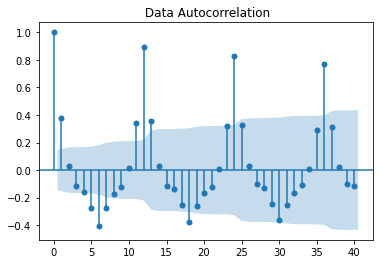

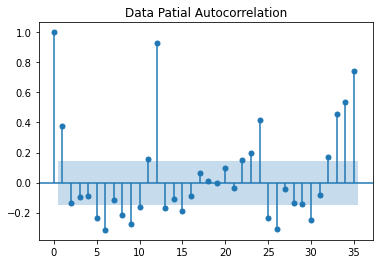

In [173]:
plot_acf(df['Sparkling'],lags=40,title=' Data Autocorrelation')
plot_pacf(df['Sparkling'],lags=35,title='Data Patial Autocorrelation')
plt.show()
# P=1, Q=1

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

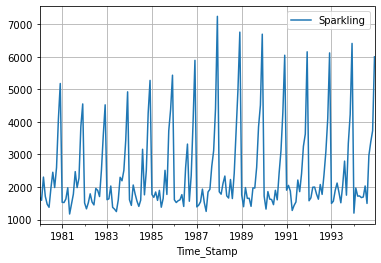

In [174]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

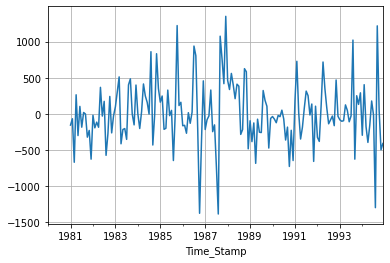

In [175]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

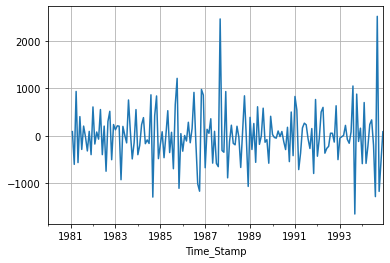

In [176]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

#### CHECKINGT HE STATIONARITY OF TEST DATA

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

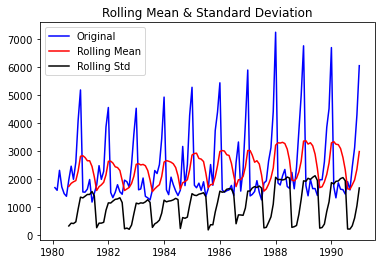

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [177]:
test_stationarity((train['Sparkling'].dropna()))

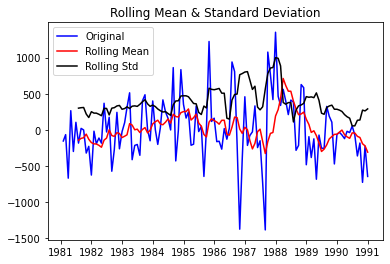

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [178]:
test_stationarity((train['Sparkling'].diff(12).dropna()))

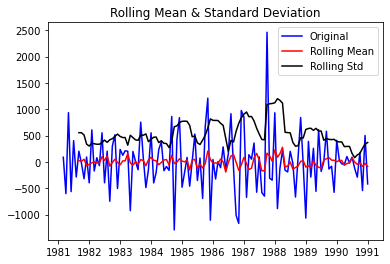

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [179]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

##### Checking the ACF and the PACF plots for the new modified Time Series.

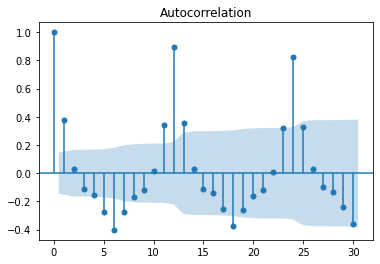

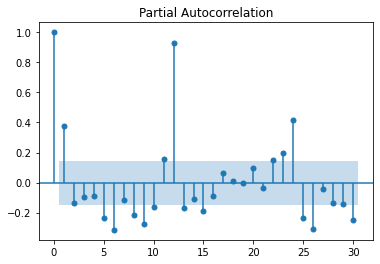

In [180]:
plot_acf(df['Sparkling'],lags=30)
plot_pacf(df['Sparkling'],lags=30)
plt.show()
        # To find P and Q P=1, Q=1

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(2) and q(3) as same parameters of the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

References for Seasonal Auto-Regressive Integrtaed Moving Average Models: $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1} {link}$ 

In [181]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -855.683
Date:                              Sun, 23 May 2021   AIC                           1727.365
Time:                                      08:02:32   BIC                           1749.394
Sample:                                           0   HQIC                          1736.307
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6468      0.291     -2.220      0.026      -1.218      -0.076
ar.L2         -0.05

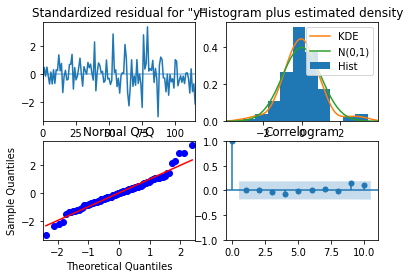

In [182]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Predict on the Test Set using manual SARIMA model (Seasonality=12) and evaluate the model.

In [183]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [184]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1317.584843,380.204587,572.397546,2062.772140
1,1234.489559,389.287489,471.500100,1997.479017
2,1543.632035,389.396455,780.429008,2306.835062
3,1521.868664,397.554386,742.676387,2301.060942
4,1324.861569,398.977562,542.879917,2106.843221


In [185]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 581.269172893754 
MAPE: 23.827279476044342


In [186]:
resultsDf_15 = pd.DataFrame({'Test RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,2)(1,0,1,12)'])
resultsDf = pd.concat([resultsDf,resultsDf_15])

resultsDf

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


The model building ends here.The least RMSE model is considered the best for predicting the forecast.
Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Q8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [187]:
results_table_s = pd.concat([resultsDf_1, resultsDf_2, resultsDf_3, resultsDf_4,  resultsDf_5,  resultsDf_6,  resultsDf_7, 
                       resultsDf_8,  resultsDf_9,  resultsDf_10,  resultsDf_11,  resultsDf_12,  resultsDf_13,  resultsDf_14, 
                       resultsDf_15])


In [188]:
results_table_s

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


## Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [189]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  180
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1124.560
Date:                            Sun, 23 May 2021   AIC                           2263.120
Time:                                    08:02:35   BIC                           2284.288
Sample:                                01-31-1980   HQIC                          2271.719
                                     - 12-31-1994                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6678      0.250     -2.671      0.008      -1.158      -0.178
ma.L1         -0.1759      0.227   

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

#### Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [190]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [191]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,1328.183351,386.410321,570.833038,2085.533663
1995-02-28,1766.092479,391.101507,999.547611,2532.637346
1995-03-31,1756.431439,391.202001,989.689607,2523.173270
1995-04-30,1771.496613,392.983257,1001.263583,2541.729644
1995-05-31,1625.496905,393.036776,855.158980,2395.834831


In [192]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 546.3764684499913


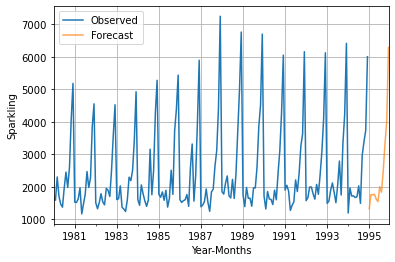

In [193]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [194]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  180
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1209.573
Date:                           Sun, 23 May 2021   AIC                           2433.145
Time:                                   08:02:37   BIC                           2454.844
Sample:                               01-31-1980   HQIC                          2441.954
                                    - 12-31-1994                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9551      0.109     -8.726      0.000      -1.170      -0.741
ma.L2         -0.1178      0.090     -1.313

In [195]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [196]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,1346.741629,379.032410,603.851757,2089.631500
1995-02-28,1698.024252,384.609920,944.202661,2451.845843
1995-03-31,1756.114644,385.483163,1000.581527,2511.647761
1995-04-30,1770.004992,386.354317,1012.764445,2527.245539
1995-05-31,1691.209039,387.223522,932.264883,2450.153196


In [197]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 541.0028199891531


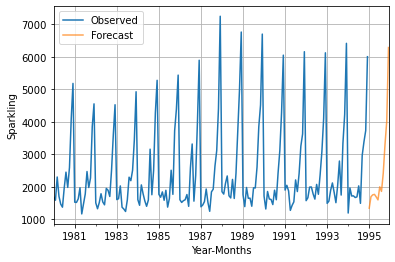

In [198]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [199]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  180
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1209.232
Date:                              Sun, 23 May 2021   AIC                           2434.464
Time:                                      08:02:39   BIC                           2459.263
Sample:                                  01-31-1980   HQIC                          2444.531
                                       - 12-31-1994                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6031      0.420     -1.434      0.151      -1.427       0.221
ar.L2         -0.01

In [200]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [201]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-01-31,1353.980838,379.269559,610.626161,2097.335515
1995-02-28,1737.047904,384.430066,983.578820,2490.516988
1995-03-31,1767.909681,384.438066,1014.424918,2521.394444
1995-04-30,1775.664031,386.223002,1018.680858,2532.647204
1995-05-31,1634.489703,386.692208,876.586903,2392.392503


In [202]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 541.9737753337789


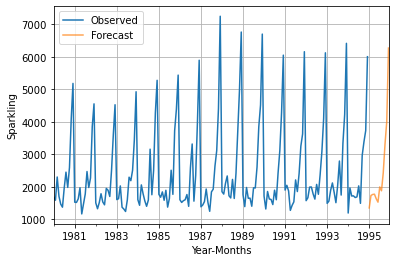

In [203]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

## Q10.  Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [204]:
results_table_s

,RMSE,Test RMSE,MAPE
RegressionOnTime,1378.580256,NaN,NaN
NaiveModel,3780.226721,NaN,NaN
SimpleAverageModel,1329.929685,NaN,NaN
2pointTrailingMovingAverage,793.036740,NaN,NaN
4pointTrailingMovingAverage,1155.559612,NaN,NaN
6pointTrailingMovingAverage,1302.932089,NaN,NaN
9pointTrailingMovingAverage,1388.801927,NaN,NaN
"Alpha=0.0496,SimpleExponentialSmoothing",1343.723719,NaN,NaN
"Alpha=0.0702,SES",1358.940488,NaN,NaN
"Alpha=0.66499,Beta=0.0001:DES",4879.866573,NaN,NaN


#### RMSE values of SARIMA models for the entire dataset considering least RMSE in the dataset are summarised as:
SARIMA(0,1,2) (2,0,2,6) - RMSE = 541.0028
SARIMA(1,1,2) (1,0,2,12) - RMSE = 546.367
SARIMA(3,1,2) (1,0,1,12) - RMSE = 541.97

#### For the test data, we have RMSE as 
RMSE values computed for ARIMA models for test data are:
SARIMA(0,1,2) (2,0,2,6) - RMSE = 572.019
SARIMA(1,1,2) (1,0,2,12) - RMSE = 522.981
SARIMA(3,1,2) (1,0,1,12) - RMSE = 581.26

The best model based on RMSE is 
##### SARIMA(1,1,2)(1,0,1,12)
as it has least RMSE among the ARIMA/SARIMA models designed for test data.

For the whole dataset, we can observe that 
##### SARIMA(0,1,2) (2,0,2,6) 
has the least RMSE among the entire dataset.
 
Based on MAPE values, the best ARIMA model is ARIMA(3,1,2) with MAPE 41.714
and the best SARIMA model based on MAPE is SARIMA(1,1,2)(1,0,2,12).

Hence, it is concluded that best model is SARIMA(1,1,2)(1,0,2,12) based on the observations from the table.

From the above table and Qn9, it is observed that the least RMSE is for the model:
#### Alpha=0.1112,Beta=0.01235,Gamma=0.460717:TES

The plots of output curves for Alpha=0.1112,Beta=0.01235,Gamma=0.460717:TES and SARIMA(1,1,2)(1,0,1,12) are plotted.

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217746964548, 'smoothing_trend': 0.012360783178126748, 'smoothing_seasonal': 0.46071776538894016, 'damping_trend': nan, 'initial_level': 2356.578364436942, 'initial_trend': -0.018474239476475418, 'initial_seasons': array([-636.23349217, -722.98352055, -398.6435547 , -473.43067518,
       -808.42508553, -815.35030575, -384.23066985,   72.99524975,
       -237.44267238,  272.32595851, 1541.37820976, 2590.07753817]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
TES RMSE: 387.1651015755533


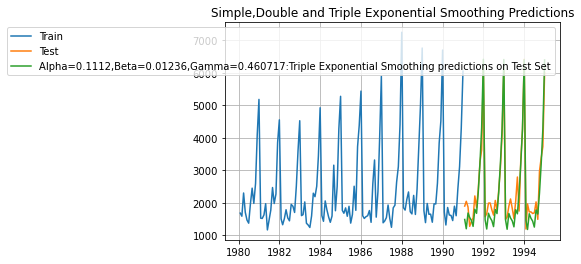

In [205]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.1112,Beta=0.01236,Gamma=0.460717:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 23 May 2021   AIC                           1555.584
Time:                                    08:02:41   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

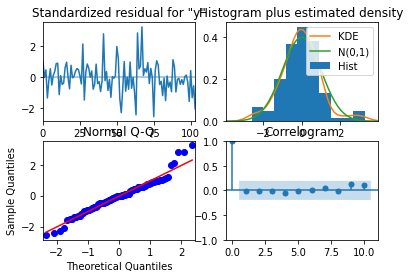

In [206]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

results_manual_SARIMA_12.plot_diagnostics()
plt.show()